<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/SYNA/ASSIGNMENT7_Dask_SYNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7: Comparison between libraries

## Library : Dask

### Group Name : SYNA
### Member Group :
| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| SARAH WARDINA BINTI RAFIDIN | A21EC0128 | Dask
| NURUNNAJWA BINTI ZULKIFLI | A21EC0121 | PySpark & Comparison
| ALYA DAMIA BINTI HUZAIMY | A21EC0159 | Modin
| YASMEEN NATASHA BINTI HAFIZ SHAHREL | A21EC0147 | Comparison

Date of submission : 25 December 2023

### **Step 1: Select a real-world dataset**

Choose a dataset larger than 1 GB from reputable sources such as Kaggle or Dataset Search. Ensure that you provide a link enabling your dataset's utilization on Google Colab.

We choose [Flight Status Prediction 2022](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022?select=Combined_Flights_2022.csv).

This dataset contains all flight information including cancellation and delays by airline for dates back to January 2022.

Here, we will use Dask library. Dask is a parallel computing library in Python that enables efficient processing of large-scale datasets by providing advanced task scheduling and parallel computing capabilities.

#### **Downloading the Dataset**

- The dataset is downloaded from Kaggle.
- We upload the dataset into Google Drive and load it into Google Colab
- On this dataset, we focus on selected column such as "Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes" and "Year" and do the analysis by focusing on them.

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Step 2: Perform data preparation and data cleaning**


Install Dask library

In [2]:
%%time

# Install Dask library
!pip install dask

CPU times: user 58.8 ms, sys: 10.6 ms, total: 69.3 ms
Wall time: 7.75 s


Import the necessary libraries

In [3]:
%%time
!pip install dask-ml
import dask
import dask.dataframe as dd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

CPU times: user 2.08 s, sys: 361 ms, total: 2.44 s
Wall time: 16 s


Read the dataset from Google Drive

In [4]:
%%time

# Read CSV into Dask DataFrame
data = dd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset/Combined_Flights_2022.csv")

CPU times: user 14.3 ms, sys: 5.08 ms, total: 19.4 ms
Wall time: 58.4 ms


In [5]:
%%time

# Display the first few rows
data.head()

CPU times: user 1.86 s, sys: 408 ms, total: 2.27 s
Wall time: 2.73 s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


In [6]:
%%time

# Check the overview of the DataFrame characteristics
data.describe()

CPU times: user 928 ms, sys: 16.3 ms, total: 944 ms
Wall time: 986 ms


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Operating_Airline,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestStateFips,DestWac,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,DivAirportLandings
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Explore the number of rows and columns in the dataset

In [7]:
%%time

#check number of partitions
data.npartitions

#display dataframe
data.compute()

CPU times: user 54.7 s, sys: 5.92 s, total: 1min
Wall time: 56.5 s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184768,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,...,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
184769,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
184770,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,...,2337.0,52.0,7.0,1838,381.0,1.0,12.0,1800-1859,3,0
184771,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,...,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1


Cleaning the dataset
- Check for missing values
- Display the data types for each attributes to understand the values.
- Remove duplicates

In [8]:
%%time
# Check for missing values
data.isnull().sum().compute()

CPU times: user 1min, sys: 2.65 s, total: 1min 2s
Wall time: 47.7 s


FlightDate                 0
Airline                    0
Origin                     0
Dest                       0
Cancelled                  0
                       ...  
ArrDel15              133402
ArrivalDelayGroups    133402
ArrTimeBlk                 0
DistanceGroup              0
DivAirportLandings         0
Length: 61, dtype: int64

In [9]:
%%time
# Check the data types
data.dtypes

CPU times: user 253 µs, sys: 22 µs, total: 275 µs
Wall time: 280 µs


FlightDate             object
Airline                object
Origin                 object
Dest                   object
Cancelled                bool
                       ...   
ArrDel15              float64
ArrivalDelayGroups    float64
ArrTimeBlk             object
DistanceGroup           int64
DivAirportLandings      int64
Length: 61, dtype: object

In [10]:
%%time
# Drop duplicates
data.drop_duplicates()

CPU times: user 22.4 ms, sys: 1.86 ms, total: 24.2 ms
Wall time: 30.2 ms


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,bool,bool,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,object,object,int64,object,int64,object,int64,object,object,int64,int64,int64,int64,object,object,int64,object,int64,int64,int64,int64,object,object,int64,object,int64,float64,float64,object,float64,float64,float64,float64,int64,float64,float64,float64,object,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [11]:
%%time
#check number of partitions
data.npartitions

#display dataframe
data.compute()

CPU times: user 46.2 s, sys: 4.52 s, total: 50.7 s
Wall time: 36.6 s


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184768,2022-03-31,Republic Airlines,MSY,EWR,False,True,1949,2014.0,25.0,25.0,...,2031.0,202.0,32.0,2354,NaN,NaN,NaN,2300-2359,5,1
184769,2022-03-17,Republic Airlines,CLT,EWR,True,False,1733,1817.0,44.0,44.0,...,NaN,NaN,NaN,1942,NaN,NaN,NaN,1900-1959,3,0
184770,2022-03-08,Republic Airlines,ALB,ORD,False,False,1700,2318.0,378.0,378.0,...,2337.0,52.0,7.0,1838,381.0,1.0,12.0,1800-1859,3,0
184771,2022-03-25,Republic Airlines,EWR,PIT,False,True,2129,2322.0,113.0,113.0,...,2347.0,933.0,6.0,2255,NaN,NaN,NaN,2200-2259,2,1


In [12]:
%%time
# Identify numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate mean and standard deviation for each numeric column
column_means = data[numeric_cols].mean()
column_stds = data[numeric_cols].std()

CPU times: user 76.6 ms, sys: 0 ns, total: 76.6 ms
Wall time: 77.6 ms


In [13]:
data.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",GJT,DEN,False,False,1133,1123.0,0.0,-10.0,...,1140.0,1220.0,8.0,1245,-17.0,0.0,-2.0,1200-1259,1,0
1,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",HRL,IAH,False,False,732,728.0,0.0,-4.0,...,744.0,839.0,9.0,849,-1.0,0.0,-1.0,0800-0859,2,0
2,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1529,1514.0,0.0,-15.0,...,1535.0,1622.0,14.0,1639,-3.0,0.0,-1.0,1600-1659,2,0
3,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",IAH,GPT,False,False,1435,1430.0,0.0,-5.0,...,1446.0,1543.0,4.0,1605,-18.0,0.0,-2.0,1600-1659,2,0
4,2022-04-04,"Commutair Aka Champlain Enterprises, Inc.",DRO,DEN,False,False,1135,1135.0,0.0,0.0,...,1154.0,1243.0,8.0,1245,6.0,0.0,0.0,1200-1259,2,0


### **Step 3: Perform exploratory analysis & visualization**

- Select the columns  that will be used to analyse the flight prediction:
    1. "Airline"
    2. "Origin"
    3. "Dest"
    4. "Cancelled"
    5. "DepDelayMinutes"
    6. "ArrDelayMinutes"
    7. "Year"

In [24]:
%%time
selected_columns = ["Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes", "Year"]
selected_data = data[selected_columns]

CPU times: user 2.62 ms, sys: 51 µs, total: 2.67 ms
Wall time: 2.64 ms


In [25]:
%%time
# Summary statistics
summary_statistics = data[numeric_cols].describe().compute()
print(summary_statistics)

         CRSDepTime       DepTime  DepDelayMinutes      DepDelay  \
count  4.078318e+06  3.957885e+06     3.957823e+06  3.957823e+06   
mean   1.329587e+03  1.334374e+03     1.601494e+01  1.309049e+01   
std    4.904801e+02  5.056219e+02     5.231498e+01  5.332016e+01   
min    1.000000e+00  1.000000e+00     0.000000e+00 -7.800000e+01   
25%    9.250000e+02  9.310000e+02     0.000000e+00 -4.000000e+00   
50%    1.328000e+03  1.331000e+03     1.000000e+00  1.000000e+00   
75%    1.800000e+03  1.814000e+03     1.900000e+01  1.900000e+01   
max    2.359000e+03  2.400000e+03     7.223000e+03  7.223000e+03   

            ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  \
count  3.954079e+06     3.944916e+06  3.944916e+06    4.078318e+06   
mean   1.457886e+03     1.578307e+01  1.110075e+02    1.413211e+02   
std    5.431841e+02     5.198424e+01  6.996246e+01    7.179635e+01   
min    1.000000e+00     0.000000e+00  8.000000e+00   -4.800000e+01   
25%    1.109000e+03     0.000000e+00 

In [26]:
%%time
# Compute summary statistics for "DepDelayMinutes"
dep_delay_stats = data["DepDelayMinutes"].describe().compute()

# Display the summary statistics for "DepDelayMinutes"
print(dep_delay_stats)

count    3.957823e+06
mean     1.601494e+01
std      5.231498e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.900000e+01
max      7.223000e+03
Name: DepDelayMinutes, dtype: float64
CPU times: user 18.2 s, sys: 2.29 s, total: 20.5 s
Wall time: 14.2 s


#### Output explanation

**"DepDelayMinutes"**

**Mean:**

- The mean departure delay is approximately 16.01 minutes.

- This indicates that, on average, flights in the sampled data experience a departure delay of around 16 minutes.

**Median(50th Percentile or Median):**

- The median departure delay is 1-minute.

- The median is the middle value when all departure delay times are sorted. In this case, half of the sampled flights have a departure delay of 1 minute or less.

**Std (Standard Deviation):**

- The standard deviation of departure delay times is approximately 52.31 minutes.

- A higher standard deviation suggests greater variability in departure delays.

- In this case, the departure delay times in the sampled data are spread out, and there is a notable amount of variability around the mean.

**Min (Minimum):**

- The minimum departure delay time is 0 minutes.

- This is the smallest departure delay observed in the sampled data.

**Max (Maximum):**

- The maximum departure delay time is 72.23 minutes.

- This is the largest departure delay observed in the sampled data.

**Summary:**
   - On average, flights have a moderate departure delay of around 16 minutes.
   - Half of the flights leave on time or earlier, which is good.
   - Departure delays vary, with some flights having longer delays.
   - Most flights leave without any delay, but there are rare instances of extremely long delays.

**Key Takeaway:**
   - While some delays are expected, efforts could be made to reduce the variability in delays and address extreme cases to improve overall departure punctuality.

In [27]:
%%time
# Compute summary statistics for "ArrDelayMinutes"
dep_delay_stats = data["ArrDelayMinutes"].describe().compute()

# Display the summary statistics for "DepDelayMinutes"
print(dep_delay_stats)

count    3.944916e+06
mean     1.578307e+01
std      5.198424e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.700000e+01
max      7.232000e+03
Name: ArrDelayMinutes, dtype: float64
CPU times: user 18 s, sys: 2.29 s, total: 20.3 s
Wall time: 13.8 s


**"ArrDelayMinutes"**

**Mean:**

- The mean arrival delay is approximately 15.78 minutes.

- This indicates that, on average, flights in the sampled data experience a arrival delay of around 16 minutes.

**Median(50th Percentile or Median):**

- The median departure delay is 0-minute.

- The median is the middle value when all departure delay times are sorted. In this case, half of the sampled flights have a departure delay of 0 minute or less.

**Std (Standard Deviation):**

- The standard deviation of departure delay times is approximately 51.98 minutes.

- A higher standard deviation suggests greater variability in departure delays.

- In this case, the departure delay times in the sampled data are spread out, and there is a notable amount of variability around the mean.

**Min (Minimum):**

- The minimum departure delay time is 0 minutes.

- This is the smallest departure delay observed in the sampled data.

**Max (Maximum):**

- The maximum departure delay time is 72.32 minutes.

- This is the largest departure delay observed in the sampled data.

**Summary**
   - On average, flights have a moderate delay upon arrival, but many flights arrive exactly on time.
   - Arrival delays vary, with some flights experiencing shorter delays than others.
   - Most flights have relatively short delays, but there are rare instances of exceptionally long delays.
   - It's generally considered good when flights arrive on time or with minimal delays.
   - The fact that the median delay is 0 minutes is positive, indicating that a significant portion of flights arrive punctually.

**Key Takeaway**   
   - The variability and occasional long delays suggest that there might be room for improvement, especially in minimizing the impact of delays for certain flights.
   
   - Most flights are doing well in terms of timely arrivals, but addressing variability and extreme delays for a small number of flights could contribute to overall improvements.

Select 10,000 rows to do the visualization.

In [23]:
%%time
# Sample 10,000 rows
selected_data = data.sample(frac=0.1, random_state=42)

# Display the sampled data
selected_data.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
148041,2022-04-19,Endeavor Air Inc.,ATW,MSP,False,False,630,625.0,0.0,-5.0,...,633.0,718.0,6.0,752,-28.0,0.0,-2.0,0700-0759,1,0
83320,2022-04-07,Southwest Airlines Co.,SMF,PDX,False,False,1640,1643.0,3.0,3.0,...,1652.0,1759.0,4.0,1810,-7.0,0.0,-1.0,1800-1859,2,0
83774,2022-04-08,Southwest Airlines Co.,AUS,LAS,False,False,645,650.0,5.0,5.0,...,703.0,734.0,6.0,740,0.0,0.0,0.0,0700-0759,5,0
99174,2022-04-25,Southwest Airlines Co.,SNA,PHX,False,False,645,641.0,0.0,-4.0,...,702.0,753.0,4.0,815,-18.0,0.0,-2.0,0800-0859,2,0
76251,2022-04-23,Southwest Airlines Co.,ONT,OAK,False,False,1240,1246.0,6.0,6.0,...,1252.0,1353.0,5.0,1400,-2.0,0.0,-1.0,1400-1459,2,0


In [32]:
%%time
# Calculate correlation matrix for all numeric columns in selected_data
correlation_matrix = selected_data.corr().compute()

# Display the correlation matrix
print(correlation_matrix)

                 Cancelled  DepDelayMinutes  ArrDelayMinutes  Year
Cancelled         1.000000         0.026395              NaN   NaN
DepDelayMinutes   0.026395         1.000000         0.980397   NaN
ArrDelayMinutes        NaN         0.980397         1.000000   NaN
Year                   NaN              NaN              NaN   NaN
CPU times: user 24.9 s, sys: 2.43 s, total: 27.3 s
Wall time: 19 s


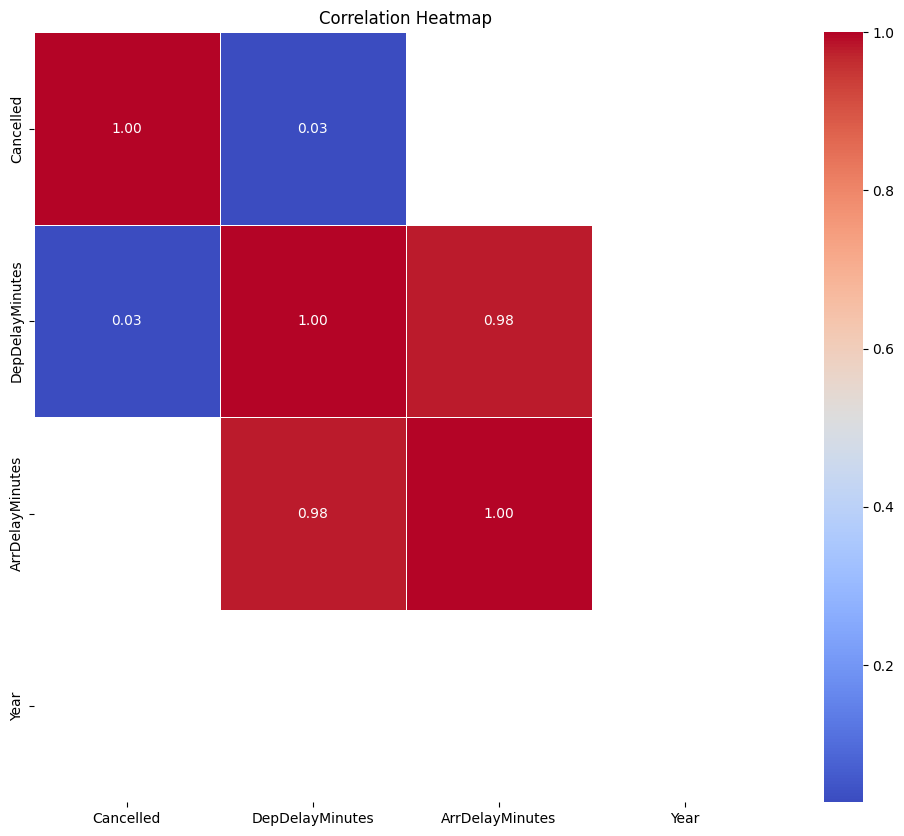

CPU times: user 323 ms, sys: 105 ms, total: 428 ms
Wall time: 312 ms


In [34]:
%%time
# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set plot title
plt.title('Correlation Heatmap')
plt.show()


DepDelayMinutes have high correlation with ArrDelayMinutes which is 0.98

 A correlation coefficient of 0.98 is very close to 1, indicating a very strong positive correlation between Departure Delay Minutes (DepDelayMinutes) and Arrival Delay Minutes (ArrDelayMinutes).

So, when the departure delay increases, there is a very strong tendency for the arrival delay to also increase. Conversely, when the departure delay decreases, the arrival delay tends to decrease as well.

This high positive correlation suggests a strong relationship or dependency between the two variables, implying that information about the departure delay can be a good predictor of the arrival delay, and vice versa.

 **Correlation between "DepDelayMinutes" and "ArrDelayMinutes"**

CPU times: user 1min 20s, sys: 41.6 s, total: 2min 1s
Wall time: 1min 19s


Text(0, 0.5, 'Arrival Delay Minutes')

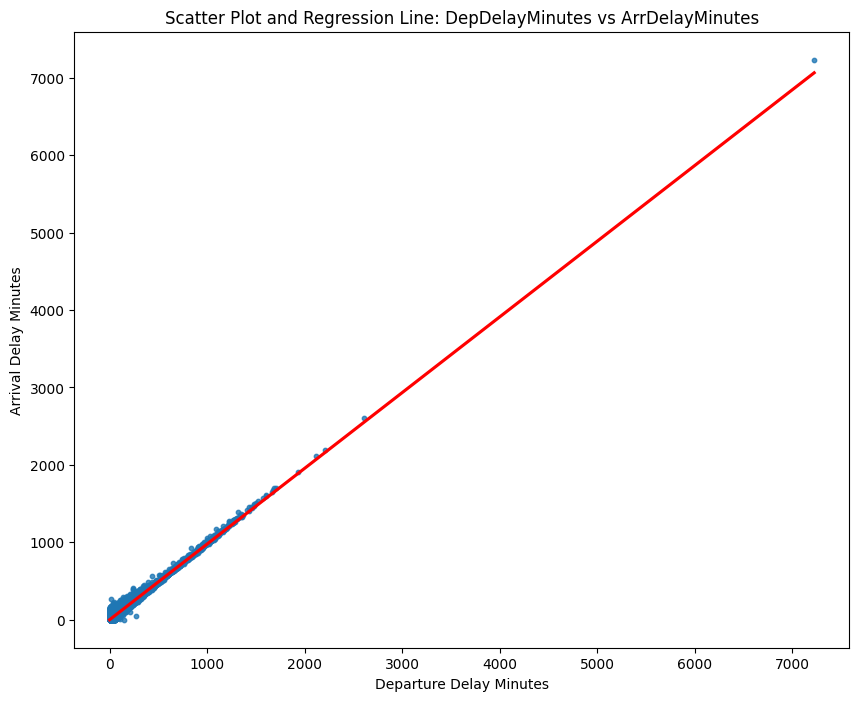

In [38]:
%%time
# Select specific columns
selected_columns = ["DepDelayMinutes", "ArrDelayMinutes"]
selected_data = data[selected_columns]

# Sample a subset for faster plotting (optional)
selected_data = selected_data.sample(frac=0.1, random_state=42)

# Convert Dask DataFrame to Pandas for plotting
selected_data_pd = selected_data.compute()
# Scatter plot with regression line
plt.figure(figsize=(10, 8))
sns.regplot(x="DepDelayMinutes", y="ArrDelayMinutes", data=selected_data_pd, scatter_kws={'s': 10}, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Scatter Plot and Regression Line: DepDelayMinutes vs ArrDelayMinutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Arrival Delay Minutes')

### **Step 4: Ask & answer questions about the data**

1. **What the Top 5 Most Popular Origins and Destinations ?**
   - To analyze the most popular origins and destinations based on the highest counts, we use the groupBy and count operations.


In [40]:
%%time
# Select specific columns
selected_columns = ["Origin", "Dest"]
selected_data = data[selected_columns]

# Count occurrences of each origin and destination
top_origins = selected_data.groupby("Origin").size().nlargest(5).compute()
top_destinations = selected_data.groupby("Dest").size().nlargest(5).compute()

# Display the top 5 most popular origins and destinations
print("Top 5 Most Popular Origins:")
print(top_origins)
print("\nTop 5 Most Popular Destinations:")
print(top_destinations)

Top 5 Most Popular Origins:
Origin
ATL    183697
ORD    172169
DFW    161218
DEN    158092
CLT    126088
dtype: int64

Top 5 Most Popular Destinations:
Dest
ATL    183671
ORD    172191
DFW    161215
DEN    158095
CLT    126099
dtype: int64
CPU times: user 38 s, sys: 4.47 s, total: 42.5 s
Wall time: 35.8 s


**Bar Plot: Top 5  Most Popular Origin and Destination**

 - We use Matplotlib to create visualiation.

 - Matplotlib allows us to create a variety of plots, including line plots, scatter plots, bar plots, histograms, pie charts, and more. It provides a high level of customization for these plots.

 - The pyplot module provides a collection of functions that make it easy to create various types of plots.

In [41]:
%%time
# Convert Dask DataFrames to Pandas DataFrames for plotting
top_origins_pd = top_origins.to_frame().reset_index()
top_destinations_pd = top_destinations.to_frame().reset_index()

CPU times: user 2.7 ms, sys: 98 µs, total: 2.8 ms
Wall time: 2.71 ms


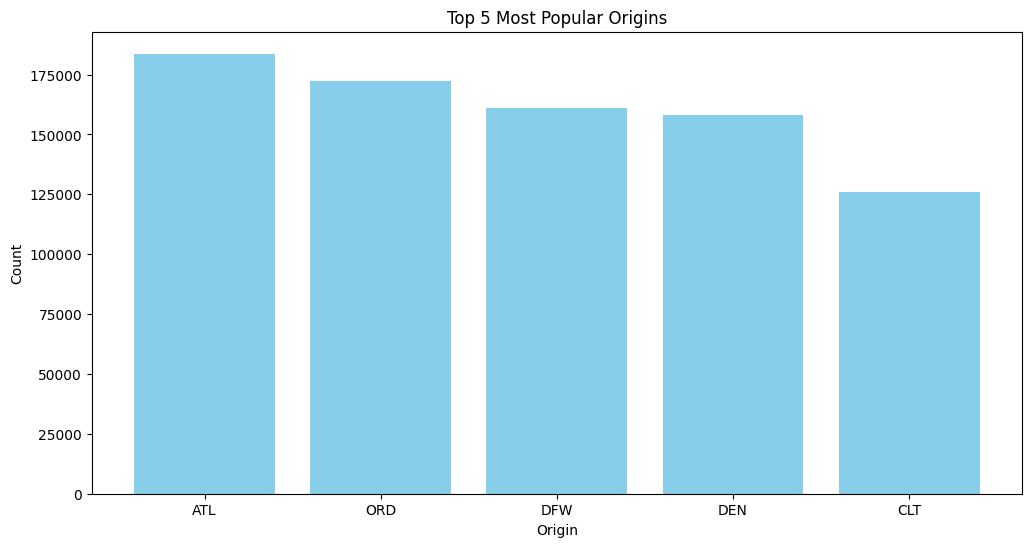

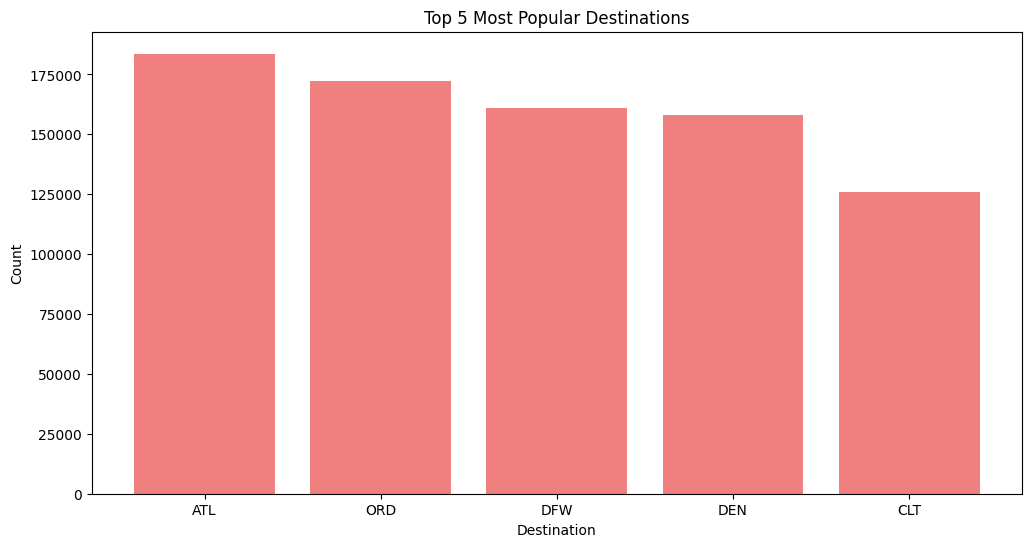

CPU times: user 556 ms, sys: 211 ms, total: 767 ms
Wall time: 547 ms


In [42]:
%%time
# Bar plot for the top 5 most popular origins
plt.figure(figsize=(12, 6))
plt.bar(top_origins_pd['Origin'], top_origins_pd[0], color='skyblue')
plt.title('Top 5 Most Popular Origins')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

# Bar plot for the top 5 most popular destinations
plt.figure(figsize=(12, 6))
plt.bar(top_destinations_pd['Dest'], top_destinations_pd[0], color='lightcoral')
plt.title('Top 5 Most Popular Destinations')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

**Origin Airports and Counts:**

- The airport with the most flights as the point of origin is Atlanta (ATL) with 183,697 flights, followed by Chicago O'Hare (ORD) with 172,169 flights, Dallas/Fort Worth (DFW) with 161,218 flights, Denver (DEN) with 158,092 flights, and Charlotte (CLT) with 126,088 flights.

**Destination Airports and Counts:**

- Flights frequently land at Atlanta (ATL) with 183,671 arrivals, followed by Chicago O'Hare (ORD) with 172,191 arrivals, Dallas/Fort Worth (DFW) with 161,215, Denver (DEN) with 158,095 arrivals, and Charlotte (CLT) with 126,099 arrivals.

2. **What is the Top 5 Most Popular Airline ?**
  - To analyze the most popular airline based on the highest count

In [44]:
%%time
# Select specific columns
selected_columns = ["Airline"]
selected_data = data[selected_columns]

# Count occurrences of each airline
top_airlines = selected_data.groupby("Airline").size().nlargest(5).compute()

# Display the top 5 most popular airlines
print("Top 5 Most Popular Airlines:")
print(top_airlines)

Top 5 Most Popular Airlines:
Airline
Southwest Airlines Co.    731925
Delta Air Lines Inc.      512114
American Airlines Inc.    495953
SkyWest Airlines Inc.     440807
United Air Lines Inc.     352009
dtype: int64
CPU times: user 18.9 s, sys: 2.22 s, total: 21.1 s
Wall time: 14.7 s


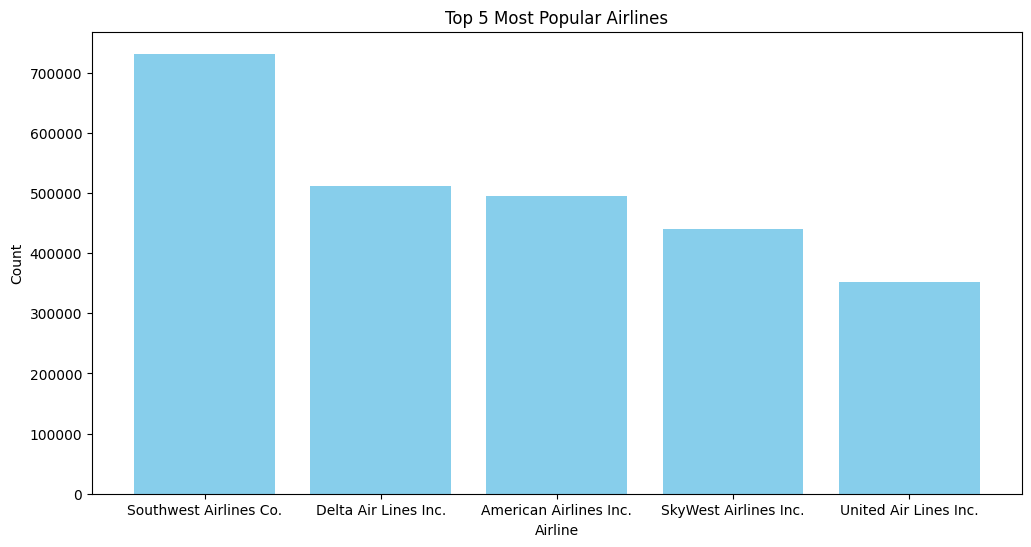

CPU times: user 307 ms, sys: 47.2 ms, total: 355 ms
Wall time: 374 ms


In [45]:
%%time
# Convert Dask DataFrames to Pandas DataFrames for plotting
top_airlines_pd = top_airlines.to_frame().reset_index()

# Bar plot for the top 5 most popular airlines
plt.figure(figsize=(12, 6))
plt.bar(top_airlines_pd['Airline'], top_airlines_pd[0], color='skyblue')
plt.title('Top 5 Most Popular Airlines')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

Each bar corresponds to a specific airline, and the length of the bar indicates the count or number of occurrences of that airline.  The bars are arranged in descending order, with the tallest bar representing the airline with the highest count.

Looking at the plot, we can observe that Southwest Airlines has the highest count, with a bar extending to 731,925. Following that, Delta Air Lines Inc. and American Airlines Inc. have the second and third-highest counts, with bars reaching 512,114 and 495,953 respectively.

SkyWest Airlines Inc. and United Air Lines Inc. complete the list with counts of 440,807 and 352,009, respectively.

3. **What is the distribution of departure delay minutes?**

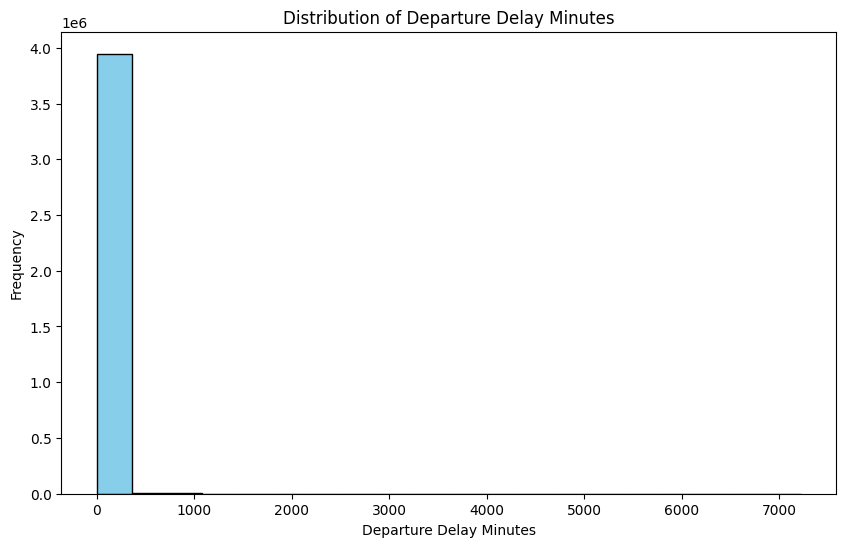

CPU times: user 18.3 s, sys: 2.34 s, total: 20.6 s
Wall time: 15 s


In [47]:
%%time
# Select specific columns
selected_columns = ["DepDelayMinutes"]
selected_data = data[selected_columns]

# Convert Dask DataFrame to Pandas for plotting
selected_data_pd = selected_data.compute()

# Histogram for distribution of departure delay minutes
plt.figure(figsize=(10, 6))
plt.hist(selected_data_pd['DepDelayMinutes'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Departure Delay Minutes')
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Frequency')
plt.show()

The bar chart shows that a lot of times (about 400,000 instances), flights left on time without any delay, as indicated by a tall bar reaching 400,000. This big bar tells us that most flights were on time.

On the other hand, there are fewer instances where flights were delayed. The bars for these instances are smaller, ranging from 250 to 50,000. This means that delays of more than 0 minutes happened less often compared to flights leaving on time.

The chart makes it easy to see that most flights in the dataset were on time, with only a smaller number experiencing delays.

4.  **How does the average arrival delay vary by airline?**

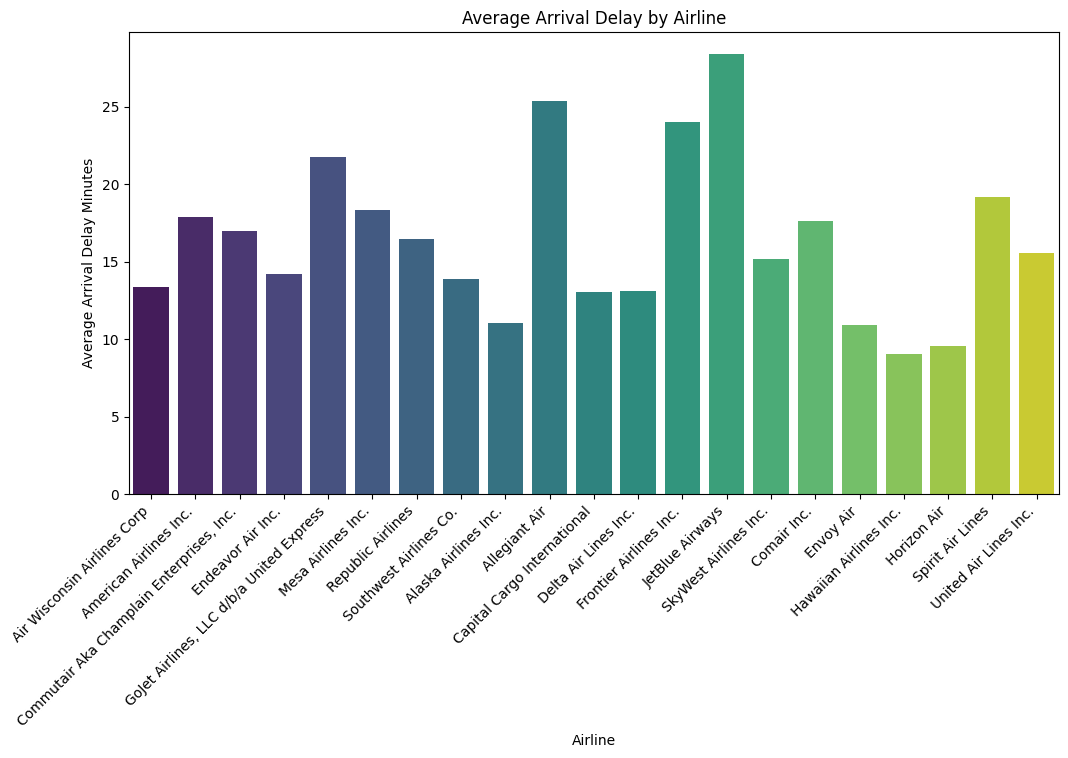

In [48]:
%%time
# Select specific columns
selected_columns = ["Airline", "ArrDelayMinutes"]
selected_data = data[selected_columns]

# Compute average arrival delay by airline
average_arrival_delay = selected_data.groupby("Airline")["ArrDelayMinutes"].mean().compute()

# Convert Dask DataFrames to Pandas DataFrames for plotting
average_arrival_delay_pd = average_arrival_delay.to_frame().reset_index()

# Bar plot for average arrival delay by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='ArrDelayMinutes', data=average_arrival_delay_pd, palette='viridis')
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar plot indicates that JetBlue Airways has the highest average arrival delay, exceeding 25 minutes. Allegiant Air follows as the second-highest, with Frontier Airlines ranking third. In contrast, Hawaiian Airlines has the lowest average arrival delay, measuring below 10 minutes.

This information highlights the variations in average arrival delays among different airlines, with JetBlue Airways experiencing the most significant delays on average, while Hawaiian Airlines tends to have shorter delays or even arrives ahead of schedule on average.

5.  **What is the top 5 airline with the most total arrival delay?**

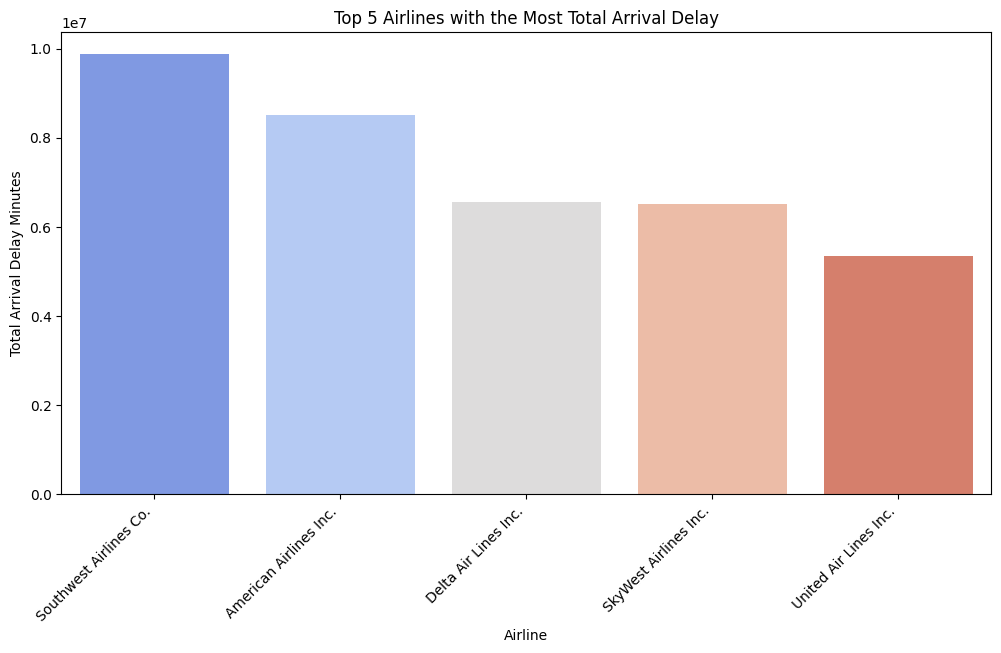

CPU times: user 19.1 s, sys: 2.36 s, total: 21.4 s
Wall time: 15.5 s


In [49]:
%%time
# Select specific columns
selected_columns = ["Airline", "ArrDelayMinutes"]
selected_data = data[selected_columns]

# Calculate the total arrival delay for each airline
total_arrival_delay = selected_data.groupby("Airline")["ArrDelayMinutes"].sum().compute()

# Get the top 5 airlines with the most total arrival delay
top_5_delayed_airlines = total_arrival_delay.nlargest(5)

# Convert Dask DataFrames to Pandas DataFrames for plotting
top_5_delayed_airlines_pd = top_5_delayed_airlines.to_frame().reset_index()

# Bar plot for total arrival delay by top 5 airlines
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='ArrDelayMinutes', data=top_5_delayed_airlines_pd, palette='coolwarm')
plt.title('Top 5 Airlines with the Most Total Arrival Delay')
plt.xlabel('Airline')
plt.ylabel('Total Arrival Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()

The airline with the highest total arrival delay is Southwest Airlines.co, totaling 1.0 minute. Following closely is American Airlines with 0.9 minute of total arrival delay. On the other hand, United Airlines has the lowest total arrival delay, amounting to 0.57 minutes.

6.  **What is the top 5 airline with the most departure delay?**

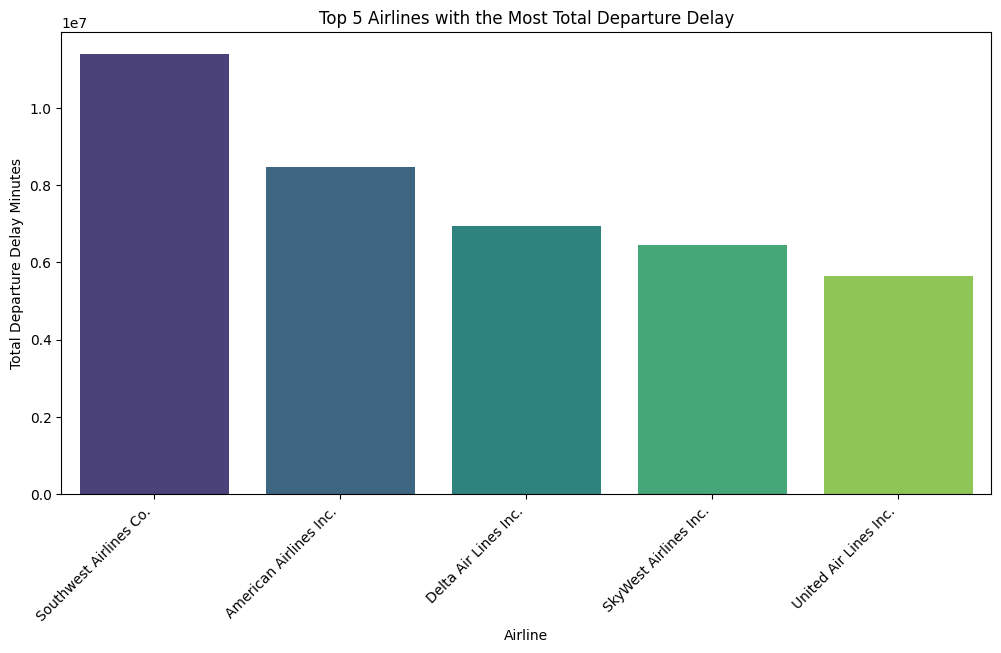

CPU times: user 19.1 s, sys: 2.29 s, total: 21.4 s
Wall time: 18.7 s


In [50]:
%%time
# Select specific columns
selected_columns = ["Airline", "DepDelayMinutes"]
selected_data = data[selected_columns]

# Calculate the total departure delay for each airline
total_departure_delay = selected_data.groupby("Airline")["DepDelayMinutes"].sum().compute()

# Get the top 5 airlines with the most total departure delay
top_5_delayed_departure_airlines = total_departure_delay.nlargest(5)

# Convert Dask DataFrames to Pandas DataFrames for plotting
top_5_delayed_departure_airlines_pd = top_5_delayed_departure_airlines.to_frame().reset_index()

# Bar plot for total departure delay by top 5 airlines
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='DepDelayMinutes', data=top_5_delayed_departure_airlines_pd, palette='viridis')
plt.title('Top 5 Airlines with the Most Total Departure Delay')
plt.xlabel('Airline')
plt.ylabel('Total Departure Delay Minutes')
plt.xticks(rotation=45, ha='right')
plt.show()

The airline with the highest total departure delay is Southwest Airlines.co, totaling 1.2 minutes. Following closely is American Airlines with 0.9 minutes of total departure delay. On the other hand, United Airlines has the lowest total departure delay, amounting to 0.57 minutes.

### **Step 5: Summarize your inferences & write a conclusion**



**Summary of Dataset Analysis:**

We use Dask to process the large datasets.

**Library : Dask**
  - Time taken to load data is 58.4 ms. Therefore, it indicates that the data loading process using Dask is highly efficient and completes in a second.

  
We chose columns based on our interest of investigation which are "Airline", "Origin", "Dest", "Cancelled", "DepDelayMinutes", "ArrDelayMinutes" and "Year".
From this selected column, we analyse the data and get the result as show below:


1. **Departure Delay Statistics:**
   - On average, flights experience a departure delay of around 16 minutes.
   - The median departure delay is 1 minutes, indicating that half of the flights leave on time or earlier.
   - Departure delays vary, with a standard deviation of about 52.31 minutes.
   - Most flights leave without any delay, but extreme cases with delays exceeding 5 days are observed.

2. **Arrival Delay Statistics:**
   - On average, flights experience an arrival delay of about 15.78 minutes.
   - The median arrival delay is 0 minutes, suggesting that a significant portion of flights arrives on time.
   - Arrival delays also exhibit variability, with a standard deviation of approximately 51.98 minutes.
   - Similar to departure delays, most flights have relatively short delays, but there are rare instances of extremely long delays.

3. **Correlation between Departure and Arrival Delays:**
   - There is a very strong positive correlation (0.98) between Departure Delay Minutes (DepDelayMinutes) and Arrival Delay Minutes (ArrDelayMinutes).
   - When departure delays increase, there is a strong tendency for arrival delays to also increase, and vice versa.
   - This correlation suggests a significant relationship, indicating that information about one can serve as a good predictor of the other.

4. **Bar Chart Insights:**
   - The bar chart visually represents the frequency of on-time departures and delays.
   - A tall bar reaching 400,000 instances indicates that a significant number of flights left on time without any delay.
   - Smaller bars (ranging from 250 to 50,000 instances) represent flights with delays, highlighting that delays are less common compared to on-time departures.

**Key Takeaways:**
   - Most flights in the dataset are on time or experience minimal delays.
   - Departure and arrival delays exhibit variability, suggesting the need for targeted improvements for specific flights.
   - Extreme delays, though rare, are present and may require attention for enhanced punctuality.
   - The strong correlation between departure and arrival delays emphasizes the interconnectedness of these events, offering insights for predictive analysis.

**Interesting Note:**
   - The median arrival and departure delays being 0 minutes is a positive sign, indicating that a significant portion of flights in the dataset is punctual. This suggests that, on average, flights tend to adhere to their schedules.
